In [1]:
import tensorflow_hub as hub
import cv2
import numpy
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import pathlib

2022-01-25 12:21:35.585244: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-01-25 12:21:35.585381: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Download model from (https://tfhub.dev/tensorflow/collections/object_detection/1)

In [2]:
detector = hub.load("https://tfhub.dev/tensorflow/efficientdet/lite2/detection/1")

2021-11-25 10:22:46.122469: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/vladimir/Work/anaconda3/lib/python3.9/site-packages/cv2/../../lib64:
2021-11-25 10:22:46.122544: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-11-25 10:22:46.122616: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (vladimir-ProBook): /proc/driver/nvidia/version does not exist


In [3]:
labels = pd.read_csv('labels.csv',sep=';',index_col='ID')
labels = labels['OBJECT (2017 REL.)']

def detect_objects (file):
    #Load image by Opencv2
    width = 1028
    height = 1028
    img = cv2.imread(file)
#Resize to respect the input_shape
    inp = cv2.resize(img, (width , height ))

#Convert img to RGB
    rgb = cv2.cvtColor(inp, cv2.COLOR_BGR2RGB)

# COnverting to uint8
    rgb_tensor = tf.convert_to_tensor(rgb, dtype=tf.uint8)

#Add dims to rgb_tensor
    rgb_tensor = tf.expand_dims(rgb_tensor , 0)
    boxes, scores, classes, num_detections = detector(rgb_tensor)
    pred_labels = classes.numpy().astype('int')[0] 
    pred_labels = [labels[i] for i in pred_labels]
    pred_boxes = boxes.numpy()[0].astype('int')
    pred_scores = scores.numpy()[0]
    for score, (ymin,xmin,ymax,xmax), label in zip(pred_scores, pred_boxes, pred_labels):
        if score < 0.5:
            continue
            
        score_txt = f'{100 * round(score)}%'
        img_boxes = cv2.rectangle(rgb,(xmin, ymax),(xmax, ymin),(255,0,0),2)      
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(img_boxes, label,(xmin, ymax-10), font, 0.5, (0,255,0), 2, cv2.LINE_AA)
        cv2.putText(img_boxes,score_txt,(xmax-100, ymax-50), font, 0.5, (0,255,0), 2, cv2.LINE_AA)
    plt.figure(figsize=(10,10))
    plt.imshow(img_boxes)

Test on one Image

2021-11-25 10:23:08.643266: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


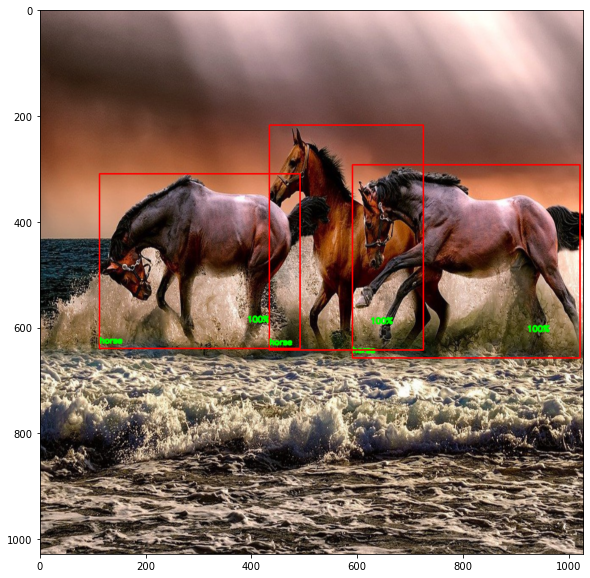

In [4]:
file = "/home/vladimir/Downloads/images/animal.jpg"
detect_objects(file)

In [5]:
PATH_TO_TEST_IMAGES_DIR = pathlib.Path('/home/vladimir/Downloads/images/')
TEST_IMAGE_PATHS = sorted(list(PATH_TO_TEST_IMAGES_DIR.glob("*.jpg")))
TEST_IMAGE_PATHS

[PosixPath('/home/vladimir/Downloads/images/animal.jpg'),
 PosixPath('/home/vladimir/Downloads/images/bmw.jpg'),
 PosixPath('/home/vladimir/Downloads/images/elephant.jpg'),
 PosixPath('/home/vladimir/Downloads/images/man.jpg'),
 PosixPath('/home/vladimir/Downloads/images/meeting.jpg'),
 PosixPath('/home/vladimir/Downloads/images/oldtimer.jpg')]

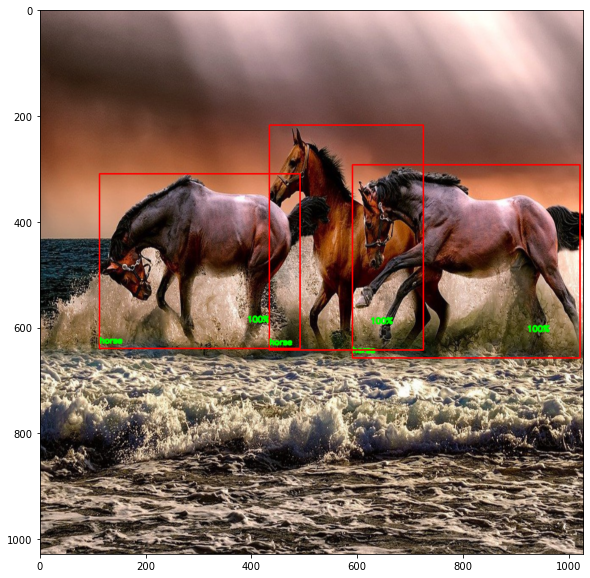

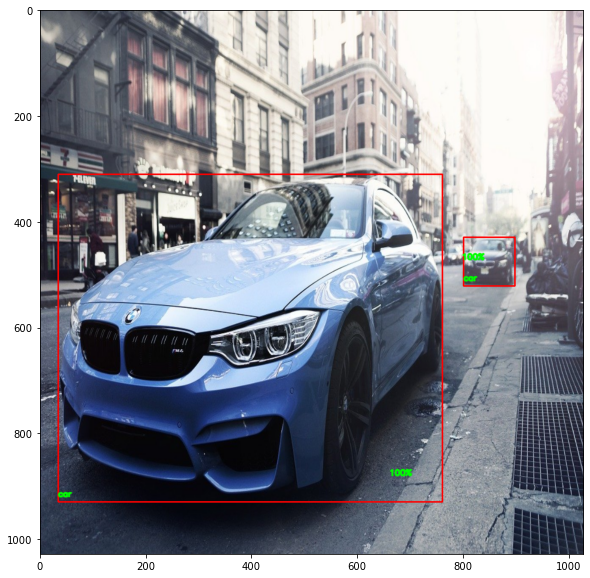

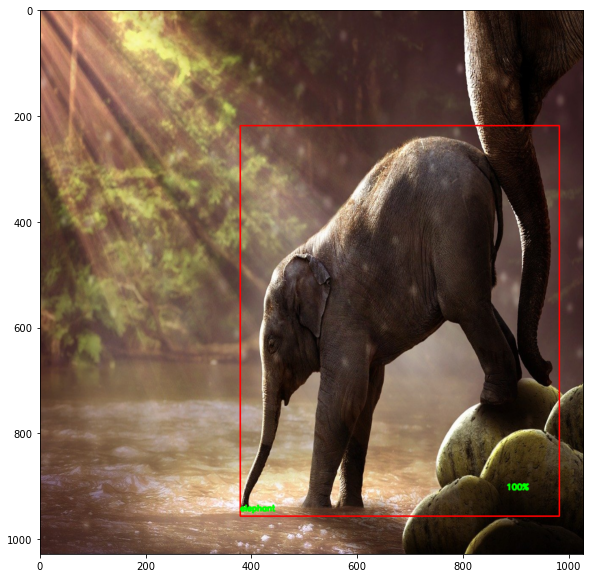

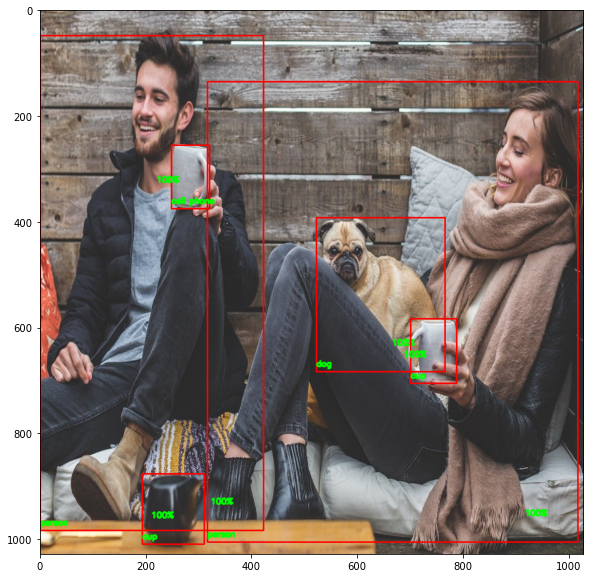

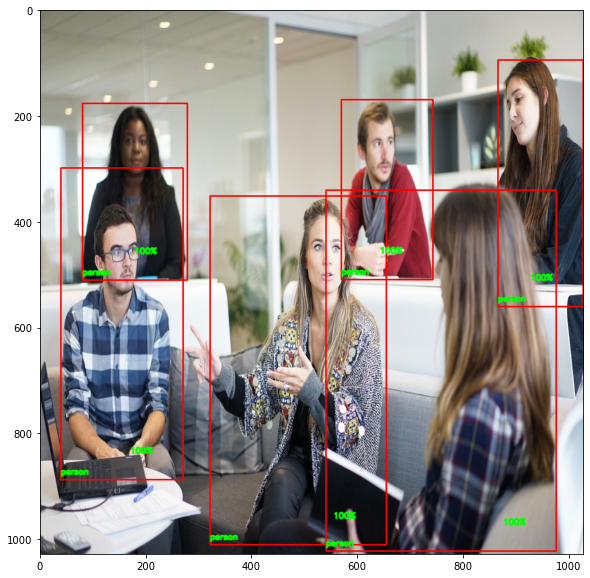

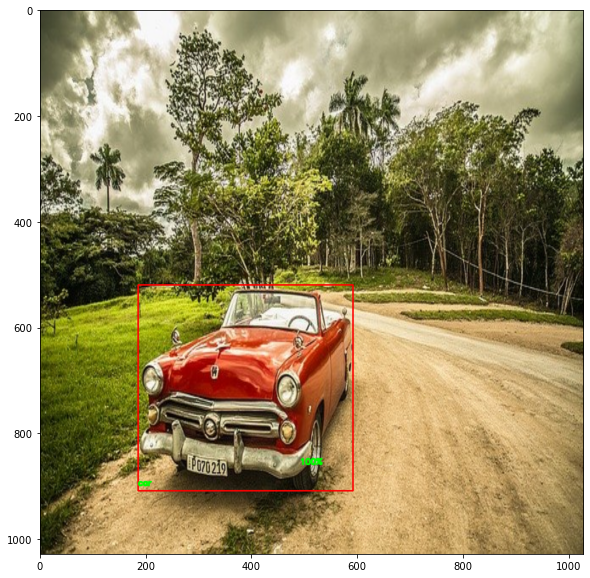

In [6]:
for image_path in TEST_IMAGE_PATHS:
    detect_objects(str(image_path))
    

In [7]:
!pip3 freeze > requirements_obj_det_2.txt